In [18]:
# Step 1: Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles for plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


In [19]:
# Step 2: Load the Titanic dataset

# Load dataset directly from GitHub source
titanic_df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Display basic information
print("Dataset loaded successfully!")
print(f"Number of rows: {titanic_df.shape[0]}")
print(f"Number of columns: {titanic_df.shape[1]}")
print("\nPreview of dataset:")
titanic_df.head()


Dataset loaded successfully!
Number of rows: 891
Number of columns: 12

Preview of dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# Step 3: Data Cleaning

# Check for missing values
print("Missing values per column:")
print(titanic_df.isnull().sum())

# Fill missing Age with median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing Embarked with most frequent value
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
titanic_df.drop(columns=['Cabin'], inplace=True)

# Verify cleaning
print("\nAfter cleaning, missing values per column:")
print(titanic_df.isnull().sum())


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

After cleaning, missing values per column:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-3651121946.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
/tmp/ipython-input-3651121946.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

<Figure size 800x500 with 0 Axes>

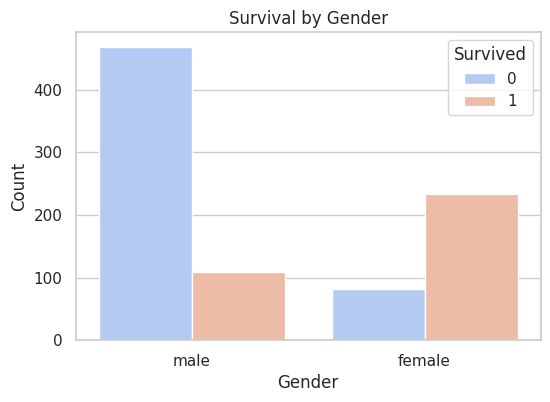

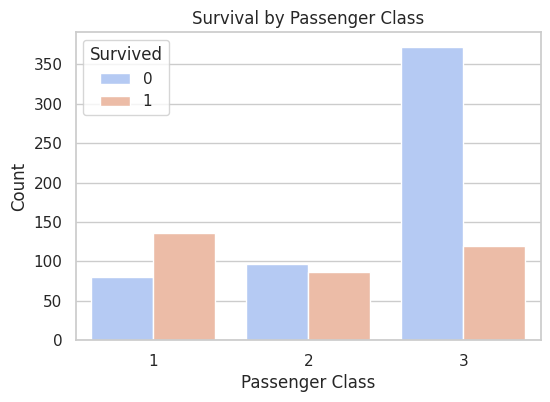

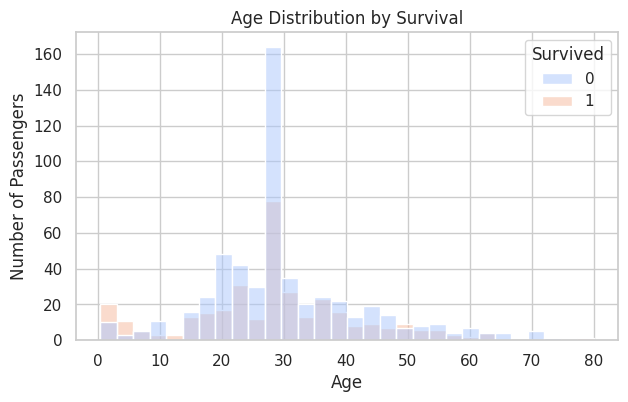

/tmp/ipython-input-921691639.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic_df, x='Pclass', y='Fare', palette='coolwarm')


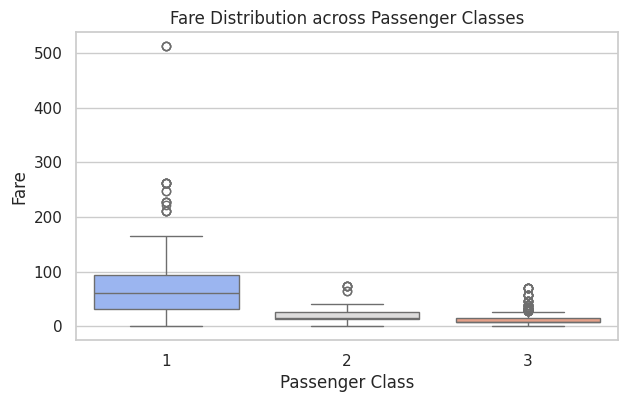

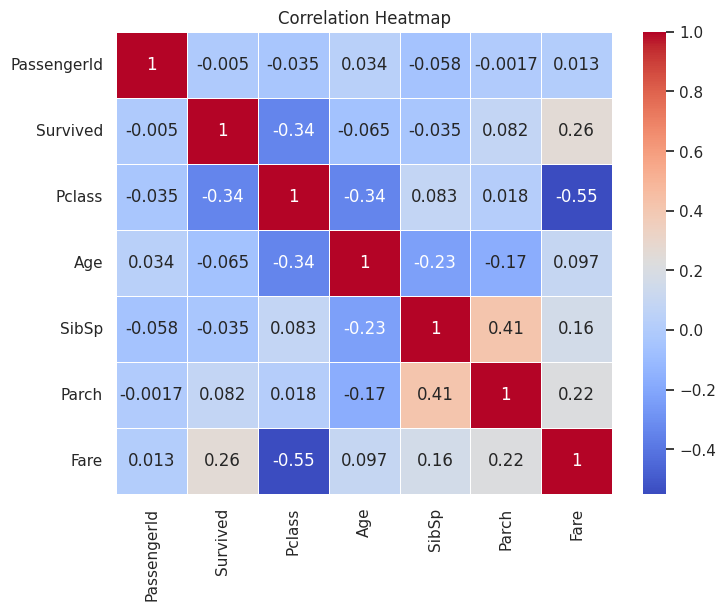

In [21]:
# Step 4: Exploring relationships & patterns in the Titanic dataset

import matplotlib.pyplot as plt
import seaborn as sns

# Just to make plots look nice
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

# Survival count by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=titanic_df, x='Sex', hue='Survived', palette='coolwarm')
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(data=titanic_df, x='Pclass', hue='Survived', palette='coolwarm')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

# Age distribution by survival status
plt.figure(figsize=(7,4))
sns.histplot(data=titanic_df, x='Age', hue='Survived', bins=30, kde=False, palette='coolwarm')
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

# Fare vs Passenger Class
plt.figure(figsize=(7,4))
sns.boxplot(data=titanic_df, x='Pclass', y='Fare', palette='coolwarm')
plt.title("Fare Distribution across Passenger Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

# Heatmap to see correlations between numeric features
plt.figure(figsize=(8,6))
corr_matrix = titanic_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [22]:
# Step 5: Key observations from the analysis

# Based on the visualizations above:

print("1. Gender seems to play a big role in survival. Female passengers had a much higher survival rate compared to males.")
print("2. Passenger Class (Pclass) is also important — people in 1st class survived more often than those in 3rd class.")
print("3. Age has some effect — many survivors were younger, especially children.")
print("4. Fares are generally higher for survivors, likely because higher-paying passengers had better access to lifeboats.")
print("5. Correlation heatmap shows Fare and Pclass are strongly related, and Age is not strongly correlated with survival directly.")


1. Gender seems to play a big role in survival. Female passengers had a much higher survival rate compared to males.
2. Passenger Class (Pclass) is also important — people in 1st class survived more often than those in 3rd class.
3. Age has some effect — many survivors were younger, especially children.
4. Fares are generally higher for survivors, likely because higher-paying passengers had better access to lifeboats.
5. Correlation heatmap shows Fare and Pclass are strongly related, and Age is not strongly correlated with survival directly.


In [23]:
# Save the dataset for reference
train.to_csv("titanic_analysis_results.csv", index=False)
print("Dataset saved as titanic_analysis_results.csv")


Dataset saved as titanic_analysis_results.csv
